In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, roc_auc_score
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder

from catboost import CatBoostClassifier

In [176]:
train = pd.read_csv('train_dataset.csv')

cat_cols = [col for col in train.columns if train[col].dtype == 'object']
num_cols = [col for col in train.columns if train[col].dtype != 'object']

for col in num_cols:
    median = train[col].mean(skipna=True)
    train[col] = train[col].fillna(median)
train[cat_cols] = train[cat_cols].fillna('')

# train_cat = train[cat_cols].fillna('')
# train = train[num_cols].fillna(0).join(train_cat)

num_cols.pop(0)
num_cols.pop(0)

train.info()

C:\Users\Meiz\AppData\Local\Temp\ipykernel_18988\2490136517.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [177]:
del_cols = ['col1280', 'col1279', 'col1278', 'col1277', 'col1276', 'col1275', 'col1274', 'col1273', 'col1180', 'col1172','col1171', 'col1170', 'col1076', 'col188',
            'col189', 'col190', 'col191', 'col192', 'col194', 'col195', 'col819', 'col820', 'col823', 'col824']

# del_cols = ['col1280', 'col1279', 'col1278', 'col1277', 'col1276', 'col1275', 'col1274', 'col1273', 'col1180', 'col1172','col1171', 'col1170', 'col1076', 'col188',
#             'col189', 'col190', 'col191', 'col192', 'col194', 'col195']

In [117]:
# DO NOT EXECUTE
train = train.drop(del_cols, axis = 1)

In [178]:
def remove_repetitions(first_list, second_list):
    return [element for element in first_list if element not in second_list]


cat_cols = remove_repetitions(cat_cols, del_cols)

In [179]:
corr_matrix = train[num_cols].corr().abs() 

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) 
 
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)] 

num_cols = remove_repetitions(num_cols, to_drop)

In [180]:
onehotencoder = OneHotEncoder(sparse_output = False)
stand_sc = StandardScaler()

data_ohe = pd.DataFrame(onehotencoder.fit_transform(train[cat_cols]))
data_num_cols = stand_sc.fit_transform(train[num_cols])
data_norm = pd.DataFrame(data_num_cols, columns=num_cols).join(data_ohe)

data_norm = data_norm.drop(0, axis=1)

y = train['target'].values
X = data_norm[data_norm.columns[:-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=62, stratify=y)
print(np.unique(y_train), np.unique(y_test))

d:\FrequentUsageFolder\Coding\Python\samolet\venv\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\FrequentUsageFolder\Coding\Python\samolet\venv\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\FrequentUsageFolder\Coding\Python\samolet\venv\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


[0 1] [0 1]


In [181]:
data_norm

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,14417,14418,14419,14420,14421,14422,14423,14424,14425,14426
0,0.0,0.0,0.0,0.0,0.0,0.0,3.305744e-14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,3.305744e-14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.305744e-14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.305744e-14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,3.305744e-14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,0.0,0.0,0.0,0.0,0.0,0.0,3.305744e-14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14452,0.0,0.0,0.0,0.0,0.0,0.0,3.305744e-14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14453,0.0,0.0,0.0,0.0,0.0,0.0,3.305744e-14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14454,0.0,0.0,0.0,0.0,0.0,0.0,3.305744e-14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# CATBOOST EXECUTION

cat = CatBoostClassifier(
    iterations=300,
    loss_function='Logloss',
    learning_rate=0.1,
    depth=14,
    eval_metric="AUC"
)

cat.fit(
    X_train,
    y_train,
    verbose=False, 
    plot=True,
    eval_set=(X_test, y_test)
)


y_pred = cat.predict(X_test)

print(f'Roc Auc Score: {roc_auc_score(y_test, y_pred)}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Roc Auc Score: 0.6309361362099699


In [36]:
# XGBOOST EXECUTION (QUESTIONABLE :+) )

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

DMatTrain = xgboost.DMatrix(X_train, y_train)
DMatTest  = xgboost.DMatrix(X_test,  y_test )

booster = xgboost.train(params={'max_depth' : 10, "objective" : "binary:logistic" }, dtrain=DMatTrain, evals=[ (DMatTrain, "train"), (DMatTest, "test") ])

print("Train RMSE: ", booster.eval(DMatTrain))
print("Test RMSE:  ", booster.eval(DMatTest ))

train_preds = [1 if pred>0.5 else 0 for pred in booster.predict(data=DMatTrain)]
test_preds  = [1 if pred>0.5 else 0 for pred in booster.predict(data=DMatTest )]

print("\nTest  Accuracy : %.2f"%accuracy_score(y_test, test_preds))
print("Train Accuracy : %.2f"%accuracy_score(y_train, train_preds))

print("\nConfusion Matrix : ")
print(confusion_matrix(y_test, test_preds))

print("\nClassification Report : ")
print(classification_report(y_test, test_preds))

print("\nRoc Auc Score: ")
print(roc_auc_score(y_test, test_preds))

[0]	train-logloss:0.46240	test-logloss:0.46587
[1]	train-logloss:0.33588	test-logloss:0.34055
[2]	train-logloss:0.25435	test-logloss:0.26319
[3]	train-logloss:0.19962	test-logloss:0.21173
[4]	train-logloss:0.16124	test-logloss:0.17711
[5]	train-logloss:0.13328	test-logloss:0.15286
[6]	train-logloss:0.11177	test-logloss:0.13515
[7]	train-logloss:0.09468	test-logloss:0.12229
[8]	train-logloss:0.08111	test-logloss:0.11237
[9]	train-logloss:0.07091	test-logloss:0.10503
Train RMSE:  [0]	eval-logloss:0.07091158308331677
Test RMSE:   [0]	eval-logloss:0.10502810302907975

Test  Accuracy : 0.97
Train Accuracy : 0.98

Confusion Matrix : 
[[2803    2]
 [  78    9]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2805
           1       0.82      0.10      0.18        87

    accuracy                           0.97      2892
   macro avg       0.90      0.55      0.58      2892
weighted avg       0.97      0.97      

In [98]:
# XGBOOST GRIDSEARCH

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [200, 300, 500],
    'max_depth'   : [10, 12, 14],
    'eta'         : [0.1, 0.05, 0.01]
}


grid_search = GridSearchCV(xgboost.XGBClassifier(), params, n_jobs=-1, cv=5)

grid_search.fit(X_train, y_train)

print("Test  Accuracy Score : %.2f"%grid_search.score(X_test, y_test))
print("Train Accuracy Score : %.2f"%grid_search.score(X_train, y_train))

print("Best Params : ", grid_search.best_params_)

Test  Accuracy Score : 0.98
Train Accuracy Score : 1.00
Best Params :  {'eta': 0.1, 'max_depth': 10, 'n_estimators': 500}


In [185]:
# XGBOOST CLASSIFIER
import xgboost

xgb_classifier = xgboost.XGBClassifier(n_estimators = 200, max_depth = 20, learning_rate = 0.1, eval_metric = "auc", booster = "gbtree", tree_method = "hist", objective = "reg:squarederror") #300, 20, 0.4 - ideal params || boosters "gbtree" "dart"

# objective reg:squarederror exact tree method, booster gbtree 350, 20, 0.1 refresh updater

xgb_classifier.fit(X_train, y_train, eval_set = [ (X_test, y_test) ], verbose = 3)

print("Test  Accuracy Score : %.2f"%xgb_classifier.score(X_test, y_test))
print("Train Accuracy Score : %.2f"%xgb_classifier.score(X_train, y_train))

print("\nRoc Auc Score: ")
test_preds = xgb_classifier.predict(X_test)
print(roc_auc_score(y_test, test_preds))

[0]	validation_0-auc:0.63336
[3]	validation_0-auc:0.65234
[6]	validation_0-auc:0.70036
[9]	validation_0-auc:0.80771
[12]	validation_0-auc:0.85949
[15]	validation_0-auc:0.90533
[18]	validation_0-auc:0.89511
[21]	validation_0-auc:0.89261
[24]	validation_0-auc:0.89558
[27]	validation_0-auc:0.89687
[30]	validation_0-auc:0.91633
[33]	validation_0-auc:0.92257
[36]	validation_0-auc:0.92912
[39]	validation_0-auc:0.93300
[42]	validation_0-auc:0.93319
[45]	validation_0-auc:0.93353
[48]	validation_0-auc:0.93353
[51]	validation_0-auc:0.93341
[54]	validation_0-auc:0.93358
[57]	validation_0-auc:0.93377
[60]	validation_0-auc:0.93967
[63]	validation_0-auc:0.93976
[66]	validation_0-auc:0.93977
[69]	validation_0-auc:0.93987
[72]	validation_0-auc:0.94151
[75]	validation_0-auc:0.94156
[78]	validation_0-auc:0.94166
[81]	validation_0-auc:0.94163
[84]	validation_0-auc:0.94172
[87]	validation_0-auc:0.94173
[90]	validation_0-auc:0.94222
[93]	validation_0-auc:0.94222
[96]	validation_0-auc:0.94227
[99]	validatio

In [182]:
# XGBOOST CLASSIFIER OBJECTIVE MULTITEST
import xgboost

# only gbtree booster 300 epoch 20 depth 0.1 lr,

objectives = ["reg:squarederror", "reg:squaredlogerror", "reg:logistic", "reg:pseudohubererror", "reg:absoluteerror", "binary:logistic", "binary:logitraw", "binary:hinge", "reg:tweedie"]
results = dict.fromkeys(objectives, 0)

for objective in objectives:
    xgb_classifier = xgboost.XGBClassifier(n_estimators = 300, max_depth = 20, learning_rate = 0.1, booster = "gbtree", tree_method = "hist", objective = objective, eval_metric = "auc",)

    xgb_classifier.fit(X_train, y_train, eval_set = [ (X_test, y_test) ], verbose = 0)

    # print("Test  Accuracy Score : %.2f"%xgb_classifier.score(X_test, y_test))
    # print("Train Accuracy Score : %.2f"%xgb_classifier.score(X_train, y_train))

    print(f"Objective - {objective} complete!")
    test_preds = xgb_classifier.predict(X_test)
    results[objective] = roc_auc_score(y_test, test_preds)

results

Objective - reg:squarederror complete!
Objective - reg:squaredlogerror complete!
Objective - reg:logistic complete!
Objective - reg:pseudohubererror complete!
Objective - reg:absoluteerror complete!
Objective - binary:logistic complete!
Objective - binary:logitraw complete!
Objective - binary:hinge complete!
Objective - reg:tweedie complete!


{'reg:squarederror': 0.857434384412072,
 'reg:squaredlogerror': 0.7426701087958694,
 'reg:logistic': 0.7739012846517918,
 'reg:pseudohubererror': 0.7710492347409184,
 'reg:absoluteerror': 0.8030364496895936,
 'binary:logistic': 0.7739012846517918,
 'binary:logitraw': 0.7512692851435245,
 'binary:hinge': 0.8107443604401008,
 'reg:tweedie': 0.5513676316921753}

Text(0.5, 0, 'False Positive Rate')

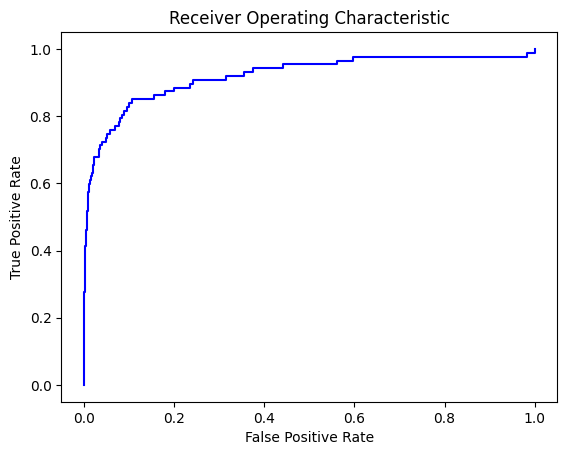

In [124]:
probs = xgb_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')